<a href="https://colab.research.google.com/github/sachsac/Predictions_of_Sales/blob/main/Project_1_Final_w_trees_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning Steps

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
filename1 = 'C:/Users/anuro/OneDrive/Documents/train.csv'
filename2 = 'C:/Users/anuro/OneDrive/Documents/test.csv'
sales_predictions1 = pd.read_csv(filename1)
sales_predictions2 = pd.read_csv(filename2)
merged_df = pd.concat([sales_predictions1,sales_predictions2 ])
sales_predictions

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket,1845.5976


In [72]:
#every grocery store is "small", Supermarkets can be anything. probably OK to delete this column as well

sales_predictions.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
#Let's simplify, supermarket vs grocery
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type2', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Type'] = 'Supermarket'
sales_predictions.value_counts('Outlet_Type')

Outlet_Type
Supermarket      7440
Grocery Store    1083
dtype: int64

In [74]:
#combining unique values into Lowfat vs Regular
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [75]:
grocery_store = sales_predictions[sales_predictions['Outlet_Type'] == 'Grocery Store']
supermarkets = sales_predictions[sales_predictions['Outlet_Type'] != 'Grocery Store']

# ML Linear Regression

In [76]:
sales_predictions.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [81]:
sales_df = pd.get_dummies(sales_predictions, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=False)
sales_df

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket
0,FDA15,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,DRC01,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,FDN15,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,FDX07,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,NCD19,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.056783,214.5218,OUT013,1987,2778.3834,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8519,FDS36,0.046982,108.1570,OUT045,2002,549.2850,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
8520,NCJ29,0.035186,85.1224,OUT035,2004,1193.1136,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8521,FDN46,0.145221,103.1332,OUT018,2009,1845.5976,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1


In [78]:
y = sales_df['Item_Outlet_Sales']
X = sales_df.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
X.dtypes
#we drop the identifiers because they only help to identify, it is not a factor of items

Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Location_Type_Tier 1          uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Loca

In [82]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [83]:
#fit the model.
from sklearn.linear_model import LinearRegression
sales_model = LinearRegression()
sales_model.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
#R2 scores
print('Training R^2:', r2_score(y_train, sales_model.predict(X_train)))
print('Testing R^2:', r2_score(y_test, sales_model.predict(X_test)))
# % of variance is due to features' data

Training R^2: 0.5264424685603026
Testing R^2: 0.5183542888366521


The test set results are comparable to the Training though is slightly above 50%

In [84]:
from sklearn.metrics import mean_squared_error
#RMSE
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, sales_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, sales_model.predict(X_test))))
#ends up being same unit as target vector
#gives +/ - value of what you are predicting
#The Test RMSE is comparable (close) to the Training set RMSE.

Training RMSE: 1183.8380538911256
Testing RMSE: 1152.7573803143316


In [15]:
importance = sales_model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 #5f is decimal allowance
 #code from https://machinelearningmastery.com/calculate-feature-importance-with-python/ for formatting

Feature: 0, Score: -503.72958
Feature: 1, Score: 15.65804
Feature: 2, Score: -42.31077
Feature: 3, Score: -27.36625
Feature: 4, Score: 27.36625
Feature: 5, Score: -23.55031
Feature: 6, Score: -46.41212
Feature: 7, Score: 18.30107
Feature: 8, Score: 20.44505
Feature: 9, Score: -142.08472
Feature: 10, Score: -8.81382
Feature: 11, Score: 21.49522
Feature: 12, Score: 3.40535
Feature: 13, Score: 14.20567
Feature: 14, Score: -18.99904
Feature: 15, Score: -7.70373
Feature: 16, Score: -73.44255
Feature: 17, Score: 316.02691
Feature: 18, Score: -38.11804
Feature: 19, Score: -58.33754
Feature: 20, Score: 23.58261
Feature: 21, Score: -194.26503
Feature: 22, Score: 121.95798
Feature: 23, Score: 72.30705
Feature: 24, Score: -1153.47433
Feature: 25, Score: 1153.47433


In [85]:
#what are these? use X.head() 
X.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket
0,0.016047,249.8092,1999,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0.019278,48.2692,2009,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0.016760,141.6180,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.000000,182.0950,1998,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.000000,53.8614,1987,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


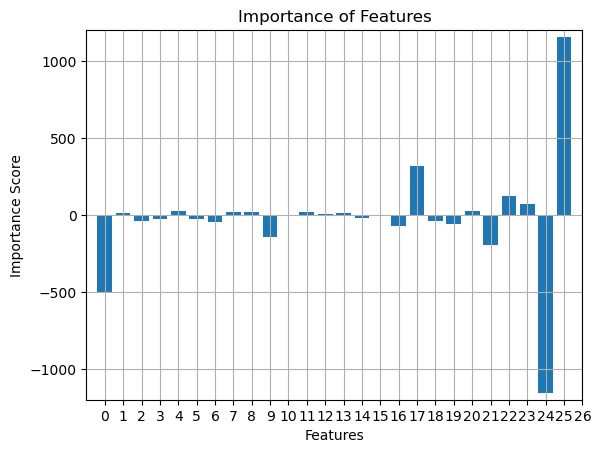

In [17]:
import matplotlib.pyplot as plt
plt.grid()
plt.bar([x for x in range(len(importance))], importance)
plt.xlim(-1, 26)
x=np.random.randint(low=0, high=26, size=26)
plt.xticks(np.arange(0, len(x)+1, 1))
plt.ylim(-1200, 1200);
plt.title('Importance of Features')
plt.ylabel('Importance Score')
plt.xlabel('Features');
#a plot can help make sense of it

Features 25, 17, 22, and 23 are the most affective:
Outlet_Type_Supermarket, Outlet_Location_Type_Tier 3, Outlet_Location_Type_Tier 2 (so Tier types in general), and Item_Type_Seafood. Outlet type (grocery vs supermarket) being by far the most associated.
Features 24 and 0 NEGATIVELY greatly impact our sales. Which are Grocery store (24) and item visibility.

# Simple Decision Tree

In [86]:
#we can use previous X & y and train/test split. only new things we need to do is make instance and load sklearn
from sklearn.tree import DecisionTreeRegressor

In [87]:
simple_tree = DecisionTreeRegressor(random_state = 42)

In [88]:
simple_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [89]:
#1 evaluate with default parameters
print('Default Simple Tree Training R^2 score:', r2_score(y_train, simple_tree.predict(X_train)))
print('Default Simple Tree Testing R^2 score:', r2_score(y_test, simple_tree.predict(X_test)))
#Not a good score at all!

Default Simple Tree Training R^2 score: 1.0
Default Simple Tree Testing R^2 score: 0.2015234037322553


In [90]:
#what is our current depth?
simple_tree.get_depth()

41

In [91]:
#list to search for max depth
max_depth_range = list(range(1,41)) #testing all between 1 and the max depth (41)

#storing the scores, basically setting up every step to be iterated for each different depth
r2 = []
for depth in max_depth_range:
  simple_tree = DecisionTreeRegressor(max_depth=depth,
                                   random_state = 42)
  simple_tree.fit(X_train, y_train)
  score = simple_tree.score(X_test, y_test) #the score for the test is the one we want to improve
  r2.append(score)

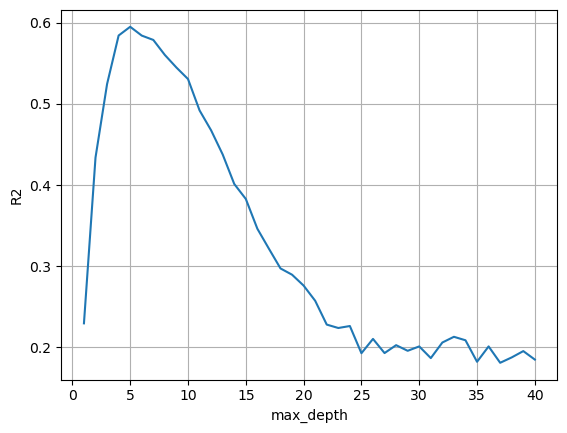

In [24]:
#visualize to see
# Visualize which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.grid()
plt.ylabel('R2');
#optimized depth is 5

In [92]:
#optimized simple tree
simple_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
simple_tree_5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [93]:
print('Optimized Simple Tree Training R^2 score:', r2_score(y_train, simple_tree_5.predict(X_train)))
print('Optimized Simple Tree Testing R^2 score:', r2_score(y_test, simple_tree_5.predict(X_test)))
#still not great, but they are at least performing more similarly!

Optimized Simple Tree Training R^2 score: 0.6039254897160836
Optimized Simple Tree Testing R^2 score: 0.5947470502499344


#Bagged Tree

In [94]:
#again, do not need to repeat setting up X and y.
#need to import bag regression
from sklearn.ensemble import BaggingRegressor

In [95]:
bagged_tree = BaggingRegressor(random_state=42)
bagged_tree

BaggingRegressor(random_state=42)

In [96]:
bagged_tree.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [97]:
bagged_tree.predict(X_test)

array([ 624.58698,  880.5205 ,  923.26486, ..., 4199.73324, 2196.8071 ,
       2368.5835 ])

In [98]:
bagged_train_score = bagged_tree.score(X_train, y_train)
bagged_test_score = bagged_tree.score(X_test, y_test)

In [99]:
print('Default Bagged Trees Training R^2 Score:', bagged_train_score)
print('Default Bagged Trees Testing R^2 Score:', bagged_test_score)
#testing score does not perform very well

Default Bagged Trees Training R^2 Score: 0.9187408937962976
Default Bagged Trees Testing R^2 Score: 0.5257784384344618


In [100]:
bt_40 = BaggingRegressor(n_estimators= 40, random_state = 42)
bt_40.fit(X_train, y_train)
bt_40_train_score = bt_40.score(X_train, y_train)
bt_40_test_score = bt_40.score(X_test, y_test)
print('Bagged Trees n_estimators at 40 Score:', bt_40_train_score)
print('Bagged Trees n_estimators at 40 Testing Score:', bt_40_test_score)

Bagged Trees n_estimators at 40 Score: 0.9338089398720247
Bagged Trees n_estimators at 40 Testing Score: 0.543828250272738


In [101]:
bt_400 = BaggingRegressor(n_estimators= 400, random_state = 42)
bt_400.fit(X_train, y_train)
bt_400_train_score = bt_400.score(X_train, y_train)
bt_400_test_score = bt_400.score(X_test, y_test)
print('Bagged Trees n_estimators at 400 Training Score:', bt_400_train_score)
print('Bagged Trees n_estimators at 400 Testing Score:', bt_400_test_score)

Bagged Trees n_estimators at 400 Training Score: 0.9395888070081836
Bagged Trees n_estimators at 400 Testing Score: 0.5500687176681904


#Random Forest Model

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf = RandomForestRegressor(random_state=42)
rf

RandomForestRegressor(random_state=42)

In [104]:
#fit  
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
#predict
r=rf.predict(X_test)
print(r)

[ 712.592424  825.352312  845.106598 ... 4162.361886 2071.343748
 2380.461372]


In [39]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Random Forests R^2 Training score:', rf_train_score)
print('Random Forests R^2 Testing score:', rf_test_score)

Random Forests R^2 Training score: 0.9374315966891082
Random Forests R^2 Testing score: 0.5523738562816447


In [106]:
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print('Random Forests Optimized Training Score:', rf_5_train_score)
print('Random Forests Optimized Testing Score:', rf_5_test_score)
#better AND closer

Random Forests Optimized Training Score: 0.6104682742026823
Random Forests Optimized Testing Score: 0.602599391637502


# R2 Scores

In [41]:
print('Linear Regression Training R^2 score:', r2_score(y_train, sales_model.predict(X_train)))
print('Linear Regression Testing R^2 score:', r2_score(y_test, sales_model.predict(X_test)))

Linear Regression Training R^2 score: 0.5264424685603026
Linear Regression Testing R^2 score: 0.5183542888366521


In [42]:
print('Optimized Simple Tree Training R^2 score:', r2_score(y_train, simple_tree_5.predict(X_train)))
print('Optimized Simple Tree Testing R^2 score:', r2_score(y_test, simple_tree_5.predict(X_test)))

Optimized Simple Tree Training R^2 score: 0.6039254897160836
Optimized Simple Tree Testing R^2 score: 0.5947470502499344


In [43]:
print('Bagged Trees n_estimators at 400 Training Score:', bt_400_train_score)
print('Bagged Trees n_estimators at 400 Testing Score:', bt_400_test_score)

Bagged Trees n_estimators at 400 Training Score: 0.9395888070081836
Bagged Trees n_estimators at 400 Testing Score: 0.5500687176681904


In [44]:
rf_train_score = rf_5.score(X_train, y_train)
rf_test_score = rf_5.score(X_test, y_test)
print('Random Forests R^2 Training score:', rf_train_score)
print('Random Forests R^2 Testing score:', rf_test_score)

Random Forests R^2 Training score: 0.6104682742026823
Random Forests R^2 Testing score: 0.602599391637502


#RMSE Scores

In [45]:
print('Linear Regression Training RMSE:', np.sqrt(mean_squared_error(y_train, sales_model.predict(X_train))))
print('Linear Regression Testing RMSE:', np.sqrt(mean_squared_error(y_test, sales_model.predict(X_test))))

Linear Regression Training RMSE: 1183.8380538911256
Linear Regression Testing RMSE: 1152.7573803143316


In [46]:
print('Optimized Simple Tree Training RMSE:', np.sqrt(mean_squared_error(y_train, simple_tree_5.predict(X_train))))
print('Optimized Simple Tree Testing RMSE:', np.sqrt(mean_squared_error(y_test, simple_tree_5.predict(X_test))))

Optimized Simple Tree Training RMSE: 1082.6656773340972
Optimized Simple Tree Testing RMSE: 1057.3947626960721


In [47]:
mse_bt_train = MSE(y_train, bt_400.predict(X_train))
mse_bt_test = MSE(y_test, bt_400.predict(X_test))
print('Bagged Tree Training RMSE:', np.sqrt(mse_bt_train))
print('Bagged Tree Testing RMSE:', np.sqrt(mse_bt_test))

Bagged Tree Training RMSE: 422.82886575645006
Bagged Tree Testing RMSE: 1114.158960394425


In [107]:
print('Random Forests Training RMSE:', np.sqrt(MSE(y_train, rf_5.predict(X_train))))
print('Random Forests Testing RMSE:', np.sqrt(MSE(y_test, rf_5.predict(X_test))))

Random Forests Training RMSE: 1073.6861217343487
Random Forests Testing RMSE: 1047.1004023648732


#Recommended model
The model I would most recommend is the Random Forests due to the highest performing R^2 scores between its training and testing, as well as a similar RMSE score that is lower or equal to the other models for testing.

C:\Users\anuro\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1743.0645  356.8688  377.5086 ... 5309.755  2530.7058 4138.613 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.